In [1]:
import pandas as pd
df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [2]:
# UNDERSTANDING DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [3]:
## EDA EXPLORATORY DATA ANALYSIS


In [4]:
# checking missing values
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
# Handling Dupliactes
df_no_duplicates=df.drop_duplicates()

In [6]:
# Data Types
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [7]:
# handling outliers
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Check outliers for numerical columns
outliers_count = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].apply(detect_outliers_iqr)
print("Number of Outliers in Each Column:\n", outliers_count)


# Function to replace outliers with median
import numpy as np
def replace_outliers_with_median(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = data.median()
    data = np.where((data < lower_bound) | (data > upper_bound), median_value, data)

    return data

# Apply function to numerical columns
df[["Open", "High", "Low", "Close", "Adj Close","Volume"]] = df[["Open", "High", "Low", "Close", "Adj Close","Volume"]].apply(replace_outliers_with_median)


Number of Outliers in Each Column:
 Open           4
High           3
Low            4
Close          5
Adj Close      3
Volume       127
dtype: int64


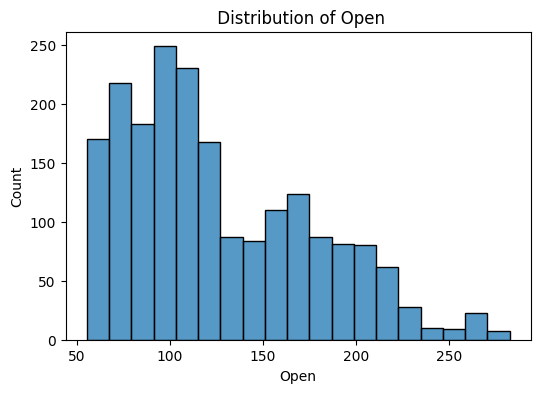

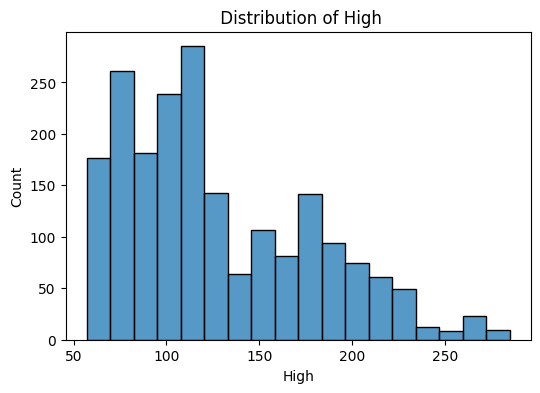

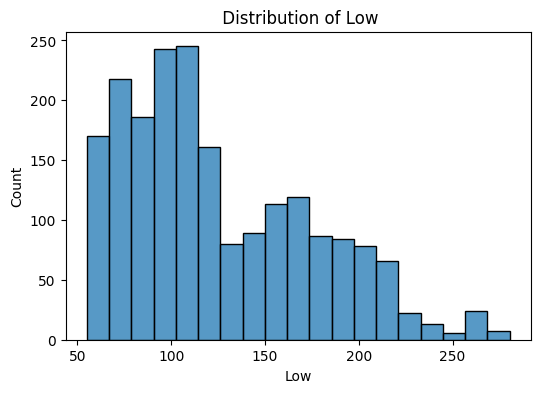

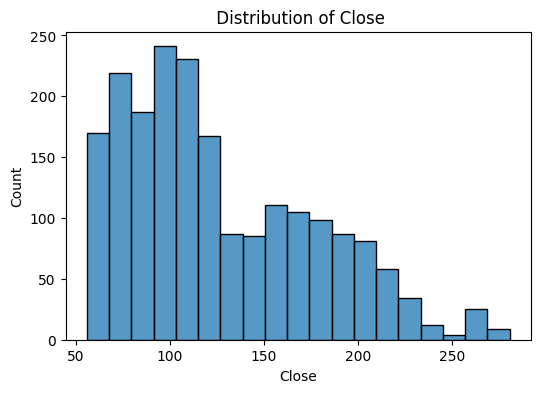

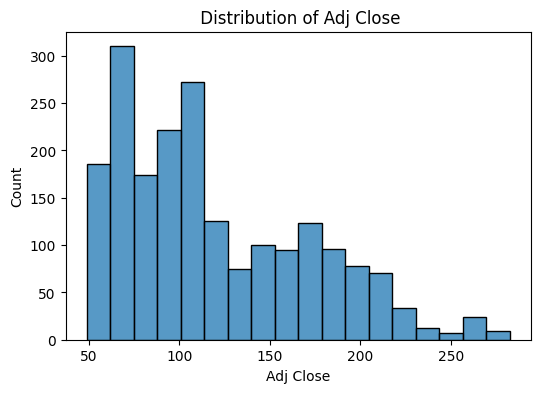

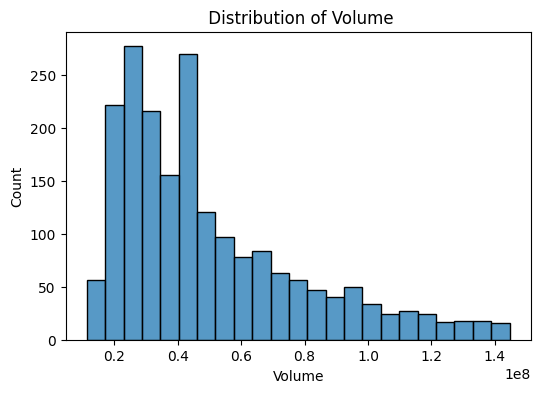

In [8]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols=df.select_dtypes(include=["number"]).columns
df[numerical_cols] = df[numerical_cols].round(2)  # Rounds to 2 decimal places

# histogram
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col])
    plt.title(f" Distribution of {col}")
    plt.show()



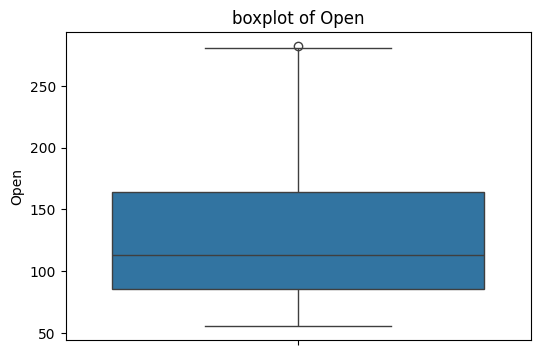

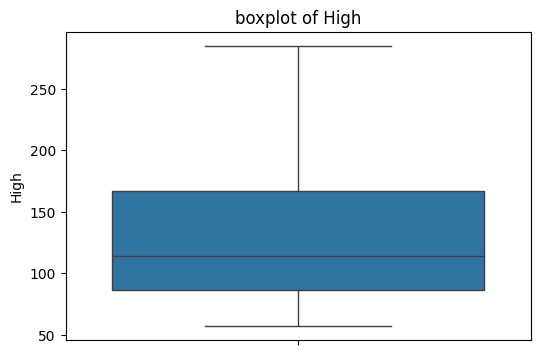

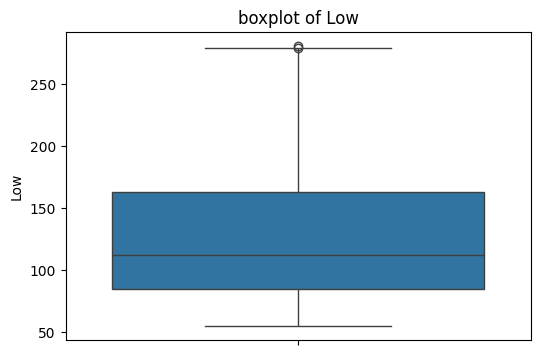

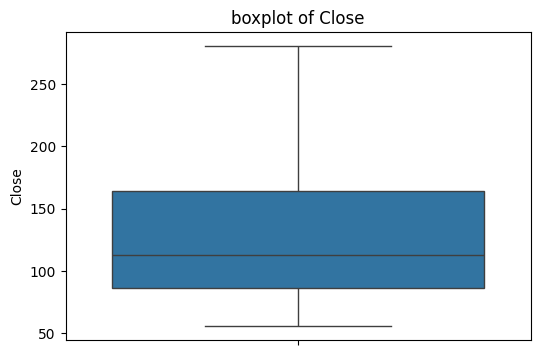

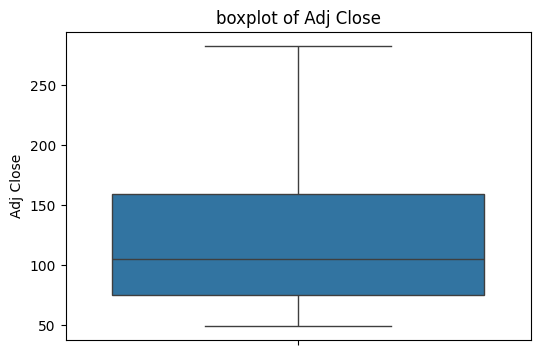

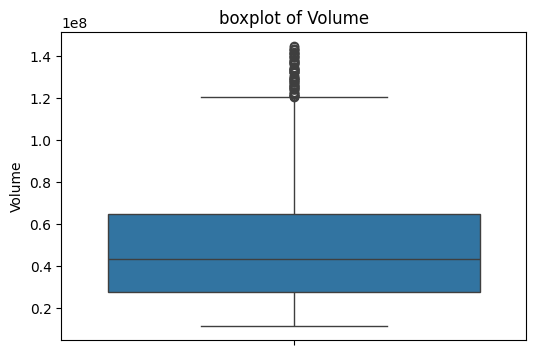

In [9]:
# boxplot
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

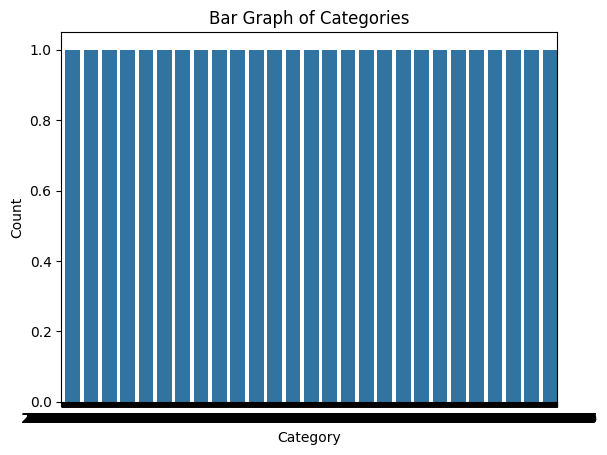

In [10]:
# bar chart for categorical variables
d=df[["Date"]]
for i in d:
    sns.countplot(x=i, data=df)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Bar Graph of Categories')
    plt.show()


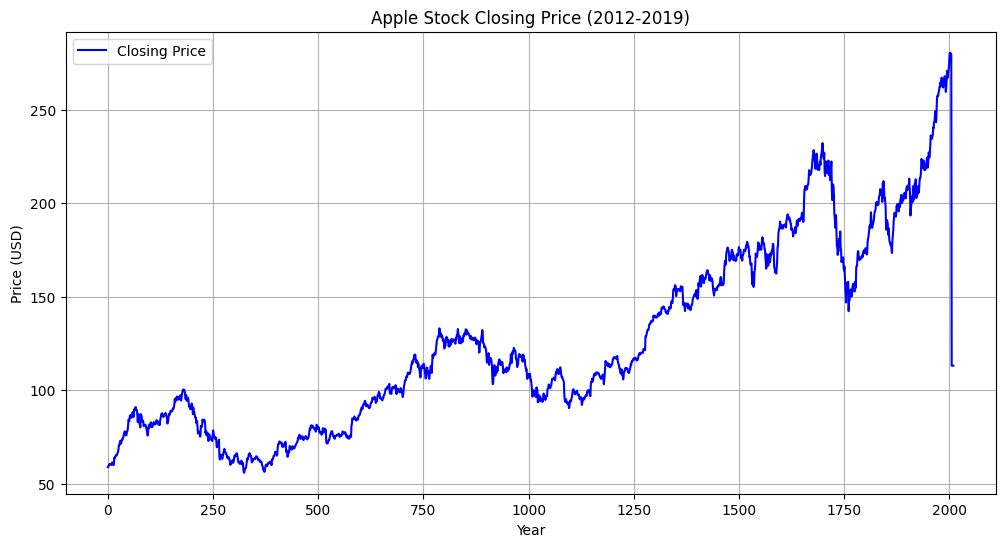

In [11]:
# Plot Closing Price over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Apple Stock Closing Price (2012-2019)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [12]:
# Moving Averages (50-day & 200-day)
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()


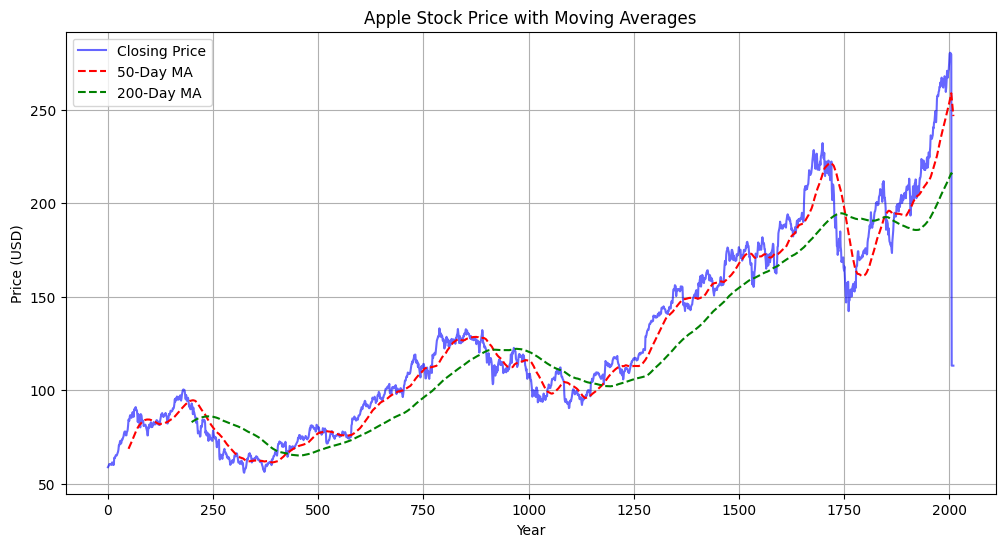

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['MA_50'], label='50-Day MA', color='red', linestyle='dashed')
plt.plot(df['MA_200'], label='200-Day MA', color='green', linestyle='dashed')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


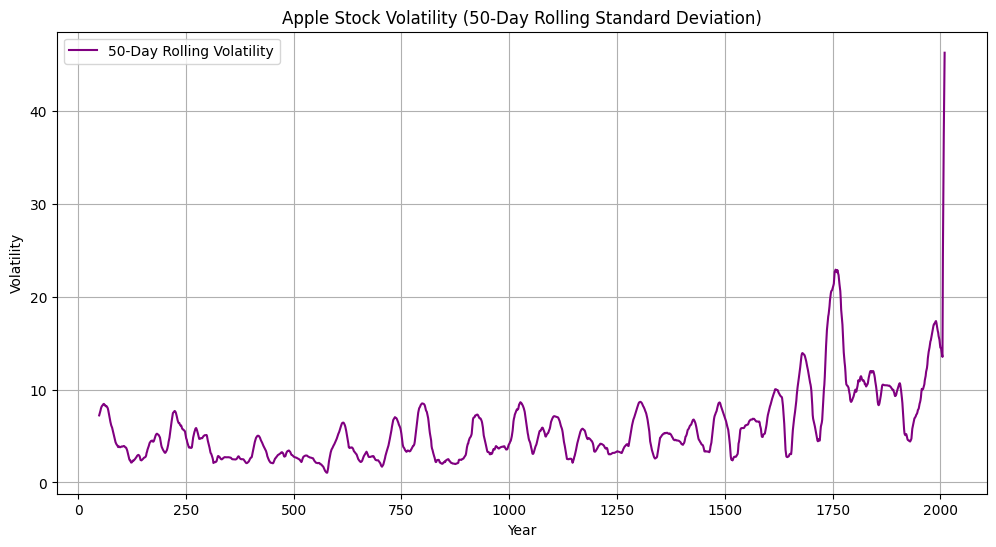

In [14]:
# Rolling Volatility (50-day standard deviation)
df['Volatility'] = df['Close'].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Volatility'], label='50-Day Rolling Volatility', color='purple')
plt.title('Apple Stock Volatility (50-Day Rolling Standard Deviation)')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()


In [15]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Now extract Year and Month correctly
df['Year'] = df.index.year
df['Month'] = df.index.month

# Verify
print(df[['Year', 'Month']].head())

            Year  Month
Date                   
2012-01-03  2012      1
2012-01-04  2012      1
2012-01-05  2012      1
2012-01-06  2012      1
2012-01-09  2012      1


<ipython-input-16-18bd19b9f7b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Close'], palette='coolwarm')


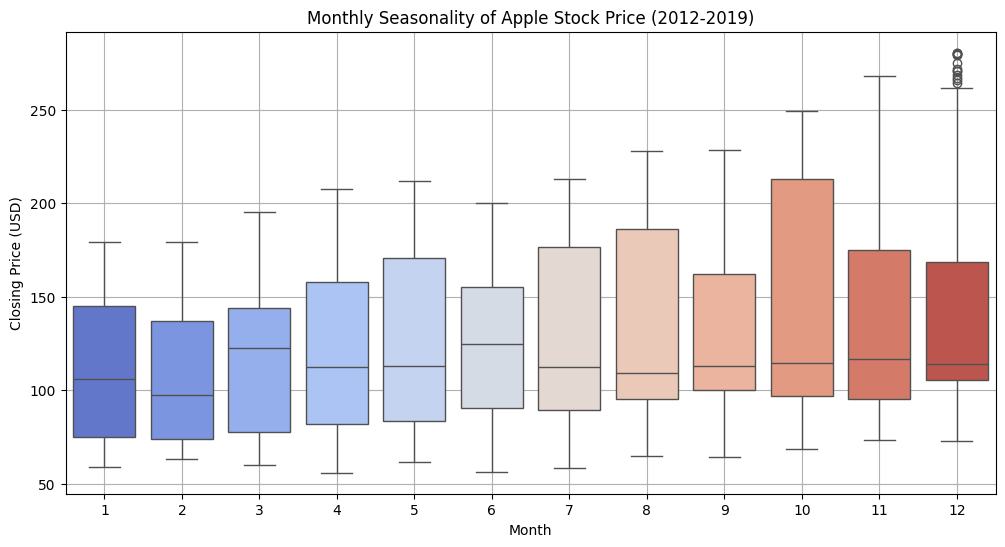

In [16]:
# Seasonality Analysis (Monthly Trends)
df['Year'] = df.index.year
df['Month'] = df.index.month

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Month'], y=df['Close'], palette='coolwarm')
plt.title('Monthly Seasonality of Apple Stock Price (2012-2019)')
plt.xlabel('Month')
plt.ylabel('Closing Price (USD)')
plt.grid()
plt.show()

In [17]:
# Split data: Training (2019) and Testing (2018)
train = df[df.index.year == 2019][['Close']]
test = df[df.index.year == 2018][['Close']]


In [18]:
# Display shapes
print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)

# Display first few rows
print("\nTraining Data Sample:")
print(train.head())

print("\nTesting Data Sample:")
print(test.head())

Training Data Shape: (251, 1)
Testing Data Shape: (251, 1)

Training Data Sample:
             Close
Date              
2019-01-02  157.92
2019-01-03  142.19
2019-01-04  148.26
2019-01-07  147.93
2019-01-08  150.75

Testing Data Sample:
             Close
Date              
2018-01-02  172.26
2018-01-03  172.23
2018-01-04  173.03
2018-01-05  175.00
2018-01-08  174.35


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

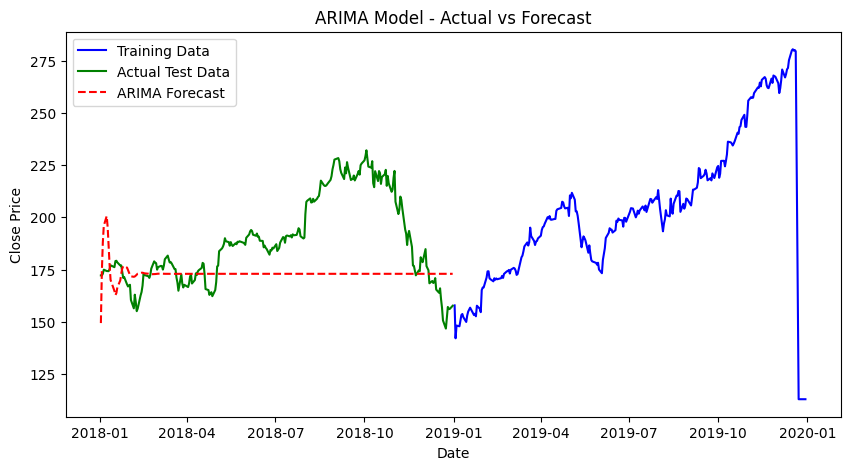

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -953.288
Date:                Thu, 13 Mar 2025   AIC                           1922.576
Time:                        15:47:58   BIC                           1950.748
Sample:                             0   HQIC                          1933.915
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6712      3.288      0.204      0.838      -5.773       7.116
ar.L2         -0.0657      3.288     -0.020      0.984      -6.509       6.378
ar.L3          0.0063      0.737      0.008      0.9

In [19]:
# MODEL BUILDING
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Keep only 'Close' column
df = df[["Close"]]

# Split data into training (2018) and testing (2019)
train = df[df.index.year == 2019][['Close']]
test = df[df.index.year == 2018][['Close']]


# Train ARIMA model
p, d, q = 5, 1, 2  # ARIMA order
model = ARIMA(train, order=(p, d, q))
fitted = model.fit()

# Forecast for the test period
forecast = fitted.forecast(steps=len(test))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("ARIMA Model - Actual vs Forecast")
plt.legend()
plt.show()

# Print model summary
print(fitted.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/stat

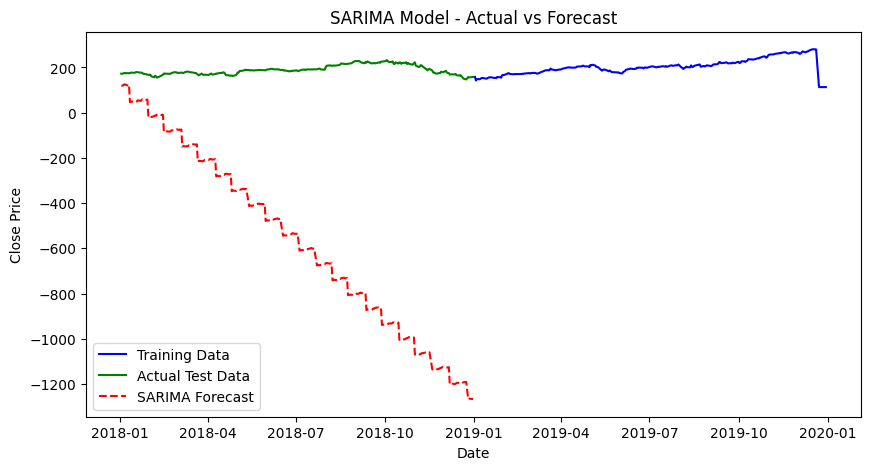

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -921.279
Date:                              Thu, 13 Mar 2025   AIC                           1856.558
Time:                                      15:48:04   BIC                           1880.864
Sample:                                           0   HQIC                          1866.354
                                              - 251                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1262      1.009     -1.116      0.264      -3.104       0.851
ar.L2         -0.91

In [20]:
# SARIMA MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define SARIMA order (p, d, q) and seasonal order (P, D, Q, s)
p, d, q = 2, 1, 2  # ARIMA components
P, D, Q, s = 1, 1, 1, 12  # Seasonal components (assuming monthly seasonality)

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fitted = sarima_model.fit()

# Forecast for the test period
sarima_forecast = sarima_fitted.forecast(steps=len(test))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("SARIMA Model - Actual vs Forecast")
plt.legend()
plt.show()

# Model summary
print(sarima_fitted.summary())


In [21]:
print(sarima_forecast)  # Displays the predicted values for 2019


251     119.983188
252     119.232169
253     120.376898
254     125.216267
255     121.759594
          ...     
497   -1190.818991
498   -1266.880614
499   -1263.968035
500   -1264.950643
501   -1266.149276
Name: predicted_mean, Length: 251, dtype: float64


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f"RMSE: {rmse:.4f}")


RMSE: 855.5185


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(test, forecast))
print(f"ARIMA RMSE: {rmse_arima:.4f}")


ARIMA RMSE: 26.3120


In [24]:
# Evaluate the model (example using RMSE)
rmse_2 = np.sqrt(mean_squared_error(test, sarima_forecast)) # Changed sarima_forecast_2 to sarima_forecast
print(f"RMSE for SARIMA model 2: {rmse_2:.4f}")

RMSE for SARIMA model 2: 855.5185


In [ ]:
# LSTM MODEL
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load dataset (assuming Date and Close columns)
df = pd.read_csv("AAPL.csv", parse_dates=["Date"], index_col="Date")
df = df[["Close"]]  # Keep only Date and Close

# Split dataset: 2018 for testing, 2019 for training
train = df[df.index.year == 2019][['Close']]
test = df[df.index.year == 2018][['Close']]


# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Function to create sequences for LSTM
def create_sequences(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i : i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 30  # Using past 30 days to predict next
X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test = create_sequences(test_scaled, time_step)

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile Model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale

# Compute RMSE
rmse_lstm = np.sqrt(mean_squared_error(test[time_step:], predictions))
print(f"LSTM RMSE: {rmse_lstm:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# Calculate RMSE for each model and compare

rmse_values = {
    "ARIMA": rmse_arima,
    "SARIMA": rmse,
    "SARIMA_2": rmse_2,
    "LSTM": rmse_lstm
}

best_model = min(rmse_values, key=rmse_values.get)
print(f"\nThe best model based on RMSE is: {best_model} with RMSE: {rmse_values[best_model]:.4f}")


In [ ]:
mean_price = test["Close"].mean()  # Average stock price in test data
rmse_percentage = (rmse_lstm / mean_price) * 100
print(f"RMSE Percentage: {rmse_percentage:.2f}%")


In [ ]:
# Save the model
model.save("lstm_stock_model.h5")

# Save the scaler (to transform future data)
import joblib
joblib.dump(scaler, "scaler.pkl")


In [ ]:
# XGBOOST MODEL
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("AAPL.csv", parse_dates=["Date"], index_col="Date")
df = df[["Close"]]  # Keep only Date and Close price

# Prepare data for supervised learning
df["Prev_Close"] = df["Close"].shift(1)  # Create lag feature
df.dropna(inplace=True)

# Split into training (2018) and testing (2019)
train = df[df.index < "2019-01-01"]
test = df[df.index >= "2019-01-01"]


# Define features and target
X_train, y_train = train[["Prev_Close"]], train["Close"]
X_test, y_test = test[["Prev_Close"]], test["Close"]

# Train XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse_xgb:.4f}")


In [ ]:
avg_price = y_test.mean()
rmse_percentage = (rmse_xgb / avg_price) * 100
print(f"RMSE Percentage: {rmse_percentage:.2f}%")
